# Logistic Regression

# Hypothesis

Sigmoid Function , $h_\theta (x) = \frac{1}{1+e^{-\theta^Tx}}$ , $p(y=1|_{x;\theta})$

# Cost Function

$J(\theta) = \frac{1}{m} \sum \limits _{i=1} ^{m} Cost(h_\theta(x^{(i)}),y^{(i)})$

$J(\theta) = -\frac{1}{m} [\sum \limits _{i=1} ^{m} y^{(i)}\log h_\theta(x^{(i)}) + (1-y^{(i)}) \log (1 -  h_\theta(x^{(i)}))]$

# Goal

$min  J(\theta)$

# Gradient Descent

Repeat {
    $\theta_j := \theta_j - \alpha \sum \limits _{i=1} ^{m}(h_\theta(x^{(i)}) - y^{(i)})x_j ^{(i)} $
}

In [181]:
def LogR_predictProbability (x,vtheta):
    assert vtheta.shape[0] == 1
    Z = np.dot (x,vtheta.T)
    return 1 / (1 + np.exp (-Z))

def LR_initVTheta (n_variables,type_init='random'):
    """
    Inicializacion de theta, 
    n_variables es el número de variables que se usarán en la regresión lineal
    """
    if type_init == 'random':
        return np.random.randn (1 , n_variables + 1)
    else:
        return np.zeros((1,n_variables +1))
    
def LR_getXMatrix (x):
    """
    Obtener matriz X para posterior pocesamiento, se añade una columna de '1'
    X es la matriz con las muestras
    """
    m = x.shape[0] # Número de muestras
    Ones = np.ones ((1,m)).T
    return np.insert (x,0,1, axis=1)

def LogR_CostFunctionV2 (theta,x,y):
    theta = np.array (theta).reshape (1,len(theta))
    y = np.array (y).reshape (len(y),1)
    prediction = LogR_predictProbability (x,theta)
    m = prediction.shape [0]
    assert prediction.shape[1] == 1
    assert y.shape[1] == 1
    assert prediction.shape[0] == y.shape[0]
    epsilon = 1e-10   # Incluido para evitar divisiones por 0
    J = - ( 1 / m) * ( np.dot(y.T, np.log(prediction+epsilon)) + np.dot((1-y).T, np.log(1-prediction+epsilon)))
    J = np.squeeze (J)
    assert J.shape == ()
    print ('Cost {}, vtheta {}'.format(J,theta))
    return J

def LogR_CostFunction (vtheta,X,y):
    prediction = LogR_predictProbability (X,vtheta)
    m = prediction.shape [0]
    assert prediction.shape[1] == 1
    assert y.shape[1] == 1
    assert prediction.shape[0] == y.shape[0]
    epsilon = 1e-10   # Incluido para evitar divisiones por 0
    J = - ( 1 / m) * ( np.dot(y.T, np.log(prediction+epsilon)) + np.dot((1-y).T, np.log(1-prediction+epsilon)))
    J = np.squeeze (J)
    #total_cost = -(1 / m) * np.sum( y * np.log(prediction) + (1 - y) * np.log( 1 - prediction))  TAMBIEN VALE
    #print ('A0',np.sum (y * np.log(prediction)))
    #print ('A1',np.sum((1 - y) * np.log( 1 - prediction)))
    #print ('A2',np.sum( y * np.log(prediction) + (1 - y) * np.log( 1 - prediction)))
    
    #print ('B0',np.dot(y.T, np.log(prediction)))
    #print ('B1',np.dot((1-y).T, np.log(1-prediction)))
    #print ('B2',np.dot(y.T, np.log(prediction+epsilon)) + np.dot((1-y).T, np.log(1-prediction+epsilon)))
    #print (J)
    #print (total_cost)

    assert J.shape == ()
    #print ('Cost {}, vtheta {}'.format(J,vtheta))
    return J

def LogR_CalculateGradsV2 (theta,X,Y):
    theta = np.array (theta).reshape (1,len(theta))
    Y = np.array (y).reshape (len(y),1)
    prediction = LogR_predictProbability (X,theta)
    m = prediction.shape [0]
    grads =  (1/m) * np.dot ((prediction-Y).T,X)
    print ('Grads ',grads)
    return grads

def LogR_CalculateGrads (prediction,Y):
    m = prediction.shape [0]
    grads =  (1/m) * np.dot ((prediction-Y).T,X)
    #print ('Grads ',grads)
    return grads


def LR_UpdateThetas (vtheta,m,vgrads,learning_rate=1e-2):
    vtheta = vtheta - learning_rate * vgrads
    return vtheta

from tqdm import tqdm

def run_experiment (X,Y,vtheta,experiment_parameters):
    iterations = []
    for iteration in range(1,len(experiment_parameters['learning_rate'])+1):
        lr = experiment_parameters['learning_rate'][iteration-1]
        vtheta_iter = np.copy (vtheta)
        costs = []
        for i in tqdm(range (experiment_parameters['steps']),desc='LR = ' + str(lr)):
            prediction = LogR_predictProbability (X, vtheta_iter)
            cost = LogR_CostFunction (vtheta_iter,X,Y)
            costs.append (cost)
            vgrads = LogR_CalculateGrads (prediction,Y)
            vtheta_iter = LR_UpdateThetas (vtheta_iter,m,vgrads,learning_rate=lr)
        iterations.append ((costs,vtheta_iter))
    return iterations 

def sigmoid(x):
    # Activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp(-x))

def net_input(theta, x):
    # Computes the weighted sum of inputs
    return np.dot(x, theta)

def probability(theta, x):
    # Returns the probability after passing through sigmoid
    return sigmoid(net_input(theta, x))

def cost_function(theta, x, y):
    # Computes the cost function for all the training samples
    m = x.shape[0]
    total_cost = -(1 / m) * np.sum(
        y * np.log(probability(theta, x)) + (1 - y) * np.log(
            1 - probability(theta, x)))
    return total_cost

def gradient(theta, x, y):
    # Computes the gradient of the cost function at the point theta
    m = x.shape[0]
    vgrads = (1 / m) * np.dot(x.T, sigmoid(net_input(theta,   x)) - y)
    return vgrads

# Visualizing the data

           0          1  2
0  34.623660  78.024693  0
1  30.286711  43.894998  0
2  35.847409  72.902198  0
3  60.182599  86.308552  1
4  79.032736  75.344376  1


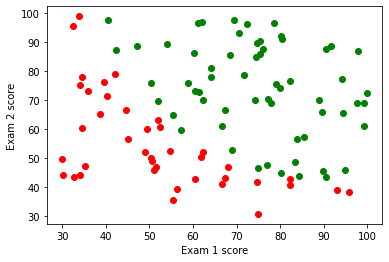

In [105]:
# Leer los datos y visualizar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

dataset =pd.read_csv('ex2data1.txt', sep=',',header=None)  #Exam 1 score, Exam 2 score , Admited (1,0)
print (dataset.head())
mask_approved = dataset.values[:,2] == 1
mask_failed = dataset.values[:,2] == 0
scores_approved = dataset.values [mask_approved,:]
scores_failed = dataset.values [mask_failed,:]

scores_approved_exam1 = scores_approved[:,0:1].reshape (1,scores_approved.shape[0])
scores_approved_exam2 = scores_approved[:,1:2].reshape (1,scores_approved.shape[0])

data_approved = {'a': scores_approved_exam1,
                 'b': scores_approved_exam2
       }

scores_failed_exam1 = scores_failed[:,0:1].reshape (1,scores_failed.shape[0])
scores_failed_exam2 = scores_failed[:,1:2].reshape (1,scores_failed.shape[0])

data_failed = {'a': scores_failed_exam1,
                 'b': scores_failed_exam2
       }

plt.scatter('a', 'b', data=data_approved,color='g')
plt.scatter('a', 'b', data=data_failed,color='r')
                                                       
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.show()

In [195]:
def UTIL_FeatureNormalization (X,debug=False):
    # X is a pandad dataframe
    
    if debug:
        print('Input Data',X.head())
        print(X.describe())
    X_norm = (X - X.mean()) / X.std ()
    if debug:
        print('Output Data',X_norm.head())
    return X_norm

X = dataset.values[:,0:2]
X = UTIL_FeatureNormalization (X)
Y = dataset.values[:,2:3]
n = X.shape [1]
m = X.shape [0]
vtheta = LR_initVTheta (n,type_init='zeros')
X = LR_getXMatrix (X)

In [201]:
from sklearn.metrics import mean_squared_error, r2_score

experiment_parameters = {'learning_rate' : [1.49e-8],
                         'steps': 10**6 }

print ('#Variables {}, #muestras {},X shape {}, Y shape {},Theta shape {} '.format(n,m,X.shape,Y.shape,vtheta.shape),flush=True)
iterations= run_experiment (X,Y,vtheta,experiment_parameters)

#Variables 2, #muestras 100,X shape (100, 3), Y shape (100, 1),Theta shape (1, 3) 


LR = 1.49e-08: 100%|██████████████████████████████████████████████████████| 1000000/1000000 [01:34<00:00, 10597.63it/s]


[[0.0020806  0.00595149 0.00513247]]


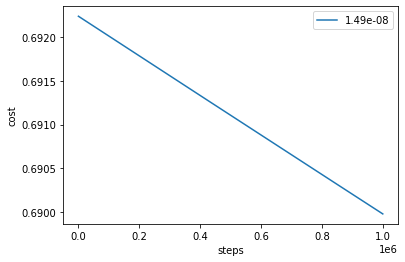

In [202]:
# Plotting costs

steps = np.arange (experiment_parameters['steps'])
i=0
vtheta=[]
for (costs,vtheta_iter) in iterations:
    #costs = iterations[iteration]
    print (vtheta_iter)
    vtheta = vtheta_iter
    plt.plot( steps , costs,label=str(experiment_parameters['learning_rate'][i]))
    i += 1

plt.xlabel('steps')
plt.ylabel('cost')
plt.legend()
plt.show()

# Plotting Decission Boundary

[ 30 100]
[ -44.51140444 -148.44120032]


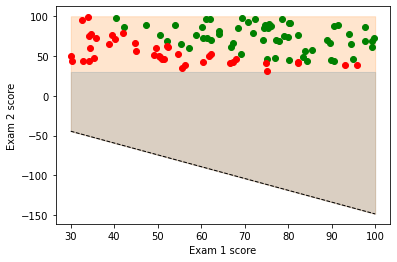

In [191]:
# Plot the data and the classification with the decision boundary.
b=vtheta[0,0:1]
w1=vtheta[0,1:2]
w2=vtheta[0,2:3]
c = -b/w2
m = -w1/w2

xmin, xmax = 30, 100
ymin, ymax = 30, 100
xd = np.array([xmin, xmax])
yd = m*xd + c
print (xd)
print (yd)
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

plt.scatter('a', 'b', data=data_approved,color='g')
plt.scatter('a', 'b', data=data_failed,color='r')
                                                       
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.show()

# Calculating parameters with function

In [109]:
data = dataset
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
    # filter out the applicants that got admitted
admitted = data.loc[y == 1]

    # filter out the applicants that din't get admission
not_admitted = data.loc[y == 0]

X = np.c_[np.ones((X.shape[0], 1)), X]  # Adding 1's in first column
y = np.array(y).reshape (len(y),1)      # Row vector
theta = np.zeros((X.shape[1], 1))

In [110]:
from scipy.optimize import fmin_tnc

def fit(x, y, theta):
    opt_weights = fmin_tnc(func=cost_function, x0=theta,
                  fprime=gradient,args=(x, y.flatten()))
    return opt_weights[0]

def fitv2(x, y, theta):
    opt_weights = fmin_tnc(func=LogR_CostFunctionV2, x0=theta,
                  fprime=LogR_CalculateGradsV2,args=(x, y.flatten()))
    return opt_weights[0]

In [165]:
# Theta = Theta - alpha * grad
alpha = - 1.49e-9 / 0.1
print (alpha)

-1.49e-08


In [162]:
parameters = fitv2(X, y, theta)
print(parameters)

Cost 0.6931471803599452, vtheta [[0. 0. 0.]]
Grads  [[ -0.1        -12.00921659 -11.26284221]]
Cost 0.6931431409779694, vtheta [[1.49011612e-09 1.78951272e-07 1.67829427e-07]]
Grads  [[ -0.09999428 -12.00882498 -11.26244974]]
Cost 0.6318123600656925, vtheta [[4.42735730e-05 5.31690927e-03 4.98646266e-03]]
Grads  [[ 0.06290371 -0.87977139 -0.10551098]]
Cost 0.6318123599983808, vtheta [[4.42727225e-05 5.31690928e-03 4.98646267e-03]]
Grads  [[ 0.06290371 -0.87977138 -0.10551097]]
Cost 0.5892425280765481, vtheta [[-0.96850438  0.02261405  0.00984198]]
Grads  [[0.15274287 6.11028614 6.04679018]]
Cost 0.5892425263536104, vtheta [[-0.9685044   0.02261406  0.00984198]]
Grads  [[0.15274287 6.11028615 6.04679015]]
Cost 0.42278244553880184, vtheta [[-5.96093577  0.08850416  0.01879109]]
Grads  [[0.06727217 4.25305926 0.65848318]]
Cost 0.42278243512310326, vtheta [[-5.96093577  0.08850416  0.01879109]]
Grads  [[0.06727214 4.25305798 0.65848185]]
Cost 0.40729268992717593, vtheta [[-5.97536666  0.08